In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw0\hokiebird.jpg")

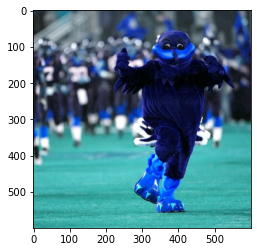

In [3]:
plt.imshow(image)

In [8]:
cv2.imshow("hokie",image)
cv2.waitKey(0)

-1

## 1) Plot the R, G, B values along the scanline on the 250th row of the image.

In [41]:
image.shape

(600, 600, 3)

In [58]:
image[250:251,:].shape

(1, 600, 3)

In [59]:
image[250:251,:]

array([[[27, 28, 32],
        [25, 26, 30],
        [26, 26, 32],
        ...,
        [22, 24, 35],
        [20, 22, 33],
        [18, 20, 31]]], dtype=uint8)

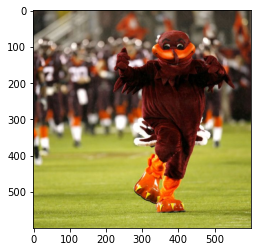

In [5]:
image_1 = plt.imread("M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw0\hokiebird.jpg")
plt.imshow(image_1)

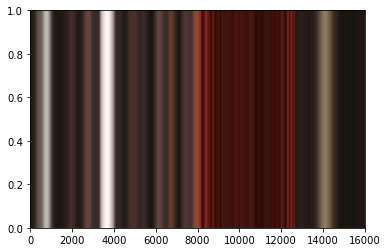

In [6]:
plt.imshow(image_1[250:251,:,:], extent=[0, 16000, 0, 1], aspect='auto')
plt.show()

## 2) Stack the R, G, B channels of the hokiebird image vertically. This will be an image with width of 1000 pixels and height of 600 pixels.

In [7]:
(b,g,r) = cv2.split(image)

In [20]:
stack = np.vstack((b,g,r))
stack = cv2.resize(stack,(600,1000), interpolation = cv2.INTER_AREA)

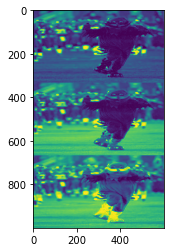

In [21]:
plt.imshow(stack)

In [39]:
cv2.imshow("hokie",stack)
cv2.waitKey(0)

-1

In [40]:
cv2.imwrite("2_concat.png",stack)

True

# 3) Load the input color image and swap its red and green color channels.

In [22]:
(b,g,r) = cv2.split(image)

In [23]:
swap = cv2.merge([b,r,g])

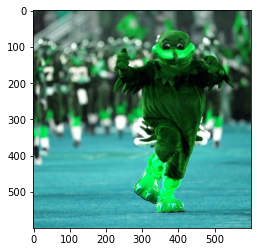

In [24]:
plt.imshow(swap)

In [90]:
cv2.imshow("hokie",swap)
cv2.waitKey(0)

-1

In [93]:
cv2.imwrite("3_swapchannel.png",swap)

True

## 4) Convert the input color image to a grayscale image.

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

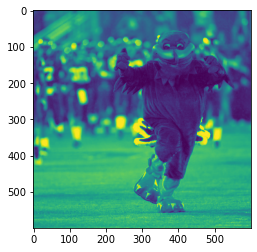

In [30]:
plt.imshow(gray)

In [8]:
cv2.imshow("hokie",gray)
cv2.waitKey(0)

-1

In [102]:
cv2.imwrite("4_grayscale.png",gray)

True

## 5) Take the R, G, B channels of the image. Compute an average over the three channels. Note that you may need to do the necessary typecasting (uint8 and double) to avoid overflow.

In [6]:
kernel = (10,10)
blurred10x10 = cv2.blur(image,kernel)
cv2.imshow("10x10 Blurred Image", blurred10x10)
cv2.waitKey(0)

-1

In [7]:
cv2.imwrite("5_average.png",blurred10x10)

True

## 6) Take the grayscale image in (4), obtain the negative image (i.e., mapping 255 to 0 and 0 to 255).

In [11]:
negative = cv2.bitwise_not(gray)

In [13]:
cv2.imshow("hokie_1",gray)
cv2.imshow("hokie",negative)
cv2.waitKey(0)

-1

In [14]:
cv2.imwrite("6_negative.png",negative)

True

## 7) First, crop the original hokie bird image into a squared image of size 372 x 372. Then, rotate the image by 90, 180, and 270 degrees and stack the four images (0, 90, 180, 270 degreess) horizontally.

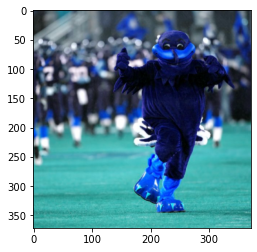

In [33]:
crop = cv2.resize(image,(372,372), interpolation = cv2.INTER_AREA)
plt.imshow(crop)


In [34]:
cv2.imshow("hokie",crop)
cv2.waitKey(0)

-1

In [35]:
(h,w) = crop.shape[:2]
center = (h//2, w//2)
scale = 1.0

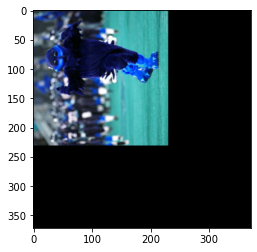

In [37]:
angle = 90
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
# Rotate the image
rotatedImage_90 = cv2.warpAffine(crop, rotationMatrix, (image.shape[1], image.shape[0]))
rotatedImage_90 = cv2.resize(rotatedImage_90,(372,372), interpolation = cv2.INTER_AREA)
plt.imshow(rotatedImage_90)

In [ ]:
cv2.imshow("hokie",rotatedImage_90)
cv2.waitKey(0)

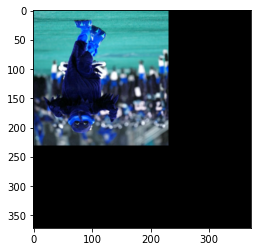

In [38]:
angle = 180
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
# Rotate the image
rotatedImage_180 = cv2.warpAffine(crop, rotationMatrix, (image.shape[1], image.shape[0]))
rotatedImage_180 = cv2.resize(rotatedImage_180,(372,372), interpolation = cv2.INTER_AREA)
plt.imshow(rotatedImage_180)


In [ ]:
cv2.imshow("hokie",rotatedImage_180)
cv2.waitKey(0)

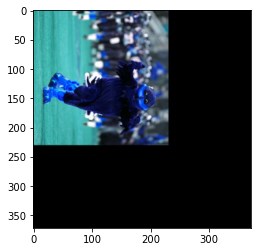

In [39]:
angle = 270
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
# Rotate the image
rotatedImage_270 = cv2.warpAffine(crop, rotationMatrix, (image.shape[1], image.shape[0]))
rotatedImage_270 = cv2.resize(rotatedImage_270,(372,372), interpolation = cv2.INTER_AREA)
plt.imshow(rotatedImage_270)


In [ ]:
cv2.imshow("hokie",rotatedImage_270)
cv2.waitKey(0)

In [40]:
stack = np.hstack((crop,rotatedImage_90,rotatedImage_180,rotatedImage_270))

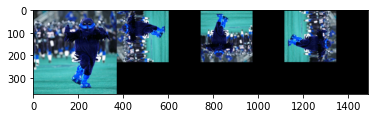

In [41]:
plt.imshow(stack)

In [29]:
cv2.imshow("hokie",stack)
cv2.waitKey(0)

-1

In [30]:
cv2.imwrite("7_rotation.png",stack)

True

## 8) Create another image with the same size as the hokie bird image. First, initialize this image as zero everywhere. Then, for each channel, set the pixel values as 255 when the corresponding pixel values in the hokie bird image are greater than 127.

In [42]:
image.shape

(600, 600, 3)

In [43]:
new_image = np.zeros([600, 600, 3])

In [44]:
thr = np.where(image>127,255,0)
new_image[:,:]=thr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


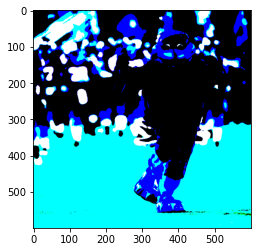

In [45]:
plt.imshow(new_image)

In [39]:
cv2.imshow("hokie",new_image)
cv2.waitKey(0)

-1

In [40]:
cv2.imwrite("8_mask.png",new_image)

True

## 9) Report the mean R, G, B values for those pixels marked by the mask in (8).

In [44]:
(b,g,r) = cv2.split(new_image)
print("Mean_Blue : {} Mean_Green : {}  Mean_Red : {}".format(np.mean(b),np.mean(g),np.mean(r)))

Mean_Blue : 22.511541666666666 Mean_Green : 123.47170833333334  Mean_Red : 150.14966666666666


## 10) Take the grayscale image in (3). Create and initialize another image as all zeros. For each 5 x 5 window in the grayscale image, find out the maximum value and set the pixels with the maximum value in the 5x5 window as 255 in the new image.

In [45]:
image.shape

(600, 600, 3)